# import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

MEMBACA FILE

In [2]:
file_path = 'produksiPadi.csv' 
df = pd.read_csv(file_path)

## MEMBERSIHKAN DATA

In [5]:
df_cleaned = df[['Tahun', 'Produksi Padi(Ton)']].dropna()
df_cleaned.columns = ['Tahun', 'Produksi']

### MENAMBAHKAN LAGGING

In [6]:
df_cleaned['Produksi_Lag'] = df_cleaned['Produksi'].shift(1)
df_lagged = df_cleaned.dropna()

## SPLIT DATA

In [7]:
X = df_lagged[['Produksi_Lag']]
y = df_lagged['Produksi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### TRAINING MODEL

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### EVALUASI MODEL

In [9]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, predictions)

In [ ]:
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)

MSE: 36689087343786.89
RMSE: 6057151.751754854
MAPE: 0.051427125784817895


### PREDIKSI TAHUN 2023 DAN 2024

In [ ]:
produksi_2022 = df_cleaned.iloc[-1]['Produksi']
prediksi_2023 = model.predict([[produksi_2022]])[0]
prediksi_2024 = model.predict([[prediksi_2023]])[0]

C:\Users\maula\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\maula\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
print("Prediksi Produksi Padi 2023:", prediksi_2023)
print("Prediksi Produksi Padi 2024:", prediksi_2024)

Prediksi Produksi Padi 2023: 55703980.47924951
Prediksi Produksi Padi 2024: 57078475.54822506


### PLOT DATA ASLI

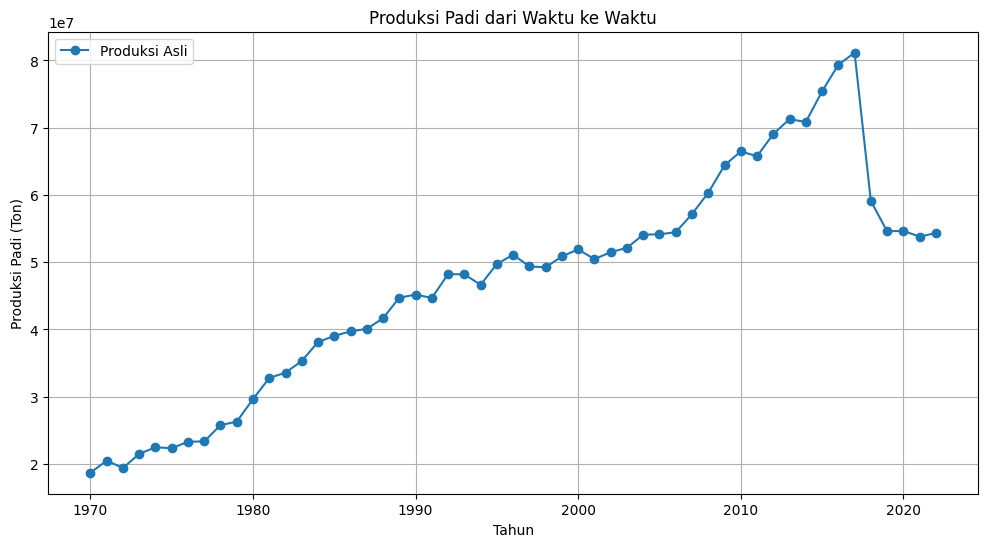

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Tahun'], df_cleaned['Produksi'], label='Produksi Asli', marker='o')
plt.title('Produksi Padi dari Waktu ke Waktu')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi (Ton)')
plt.legend()
plt.grid()
plt.show()

### PLOT HASIL PREDIKSI DAN DATA AKTUAL

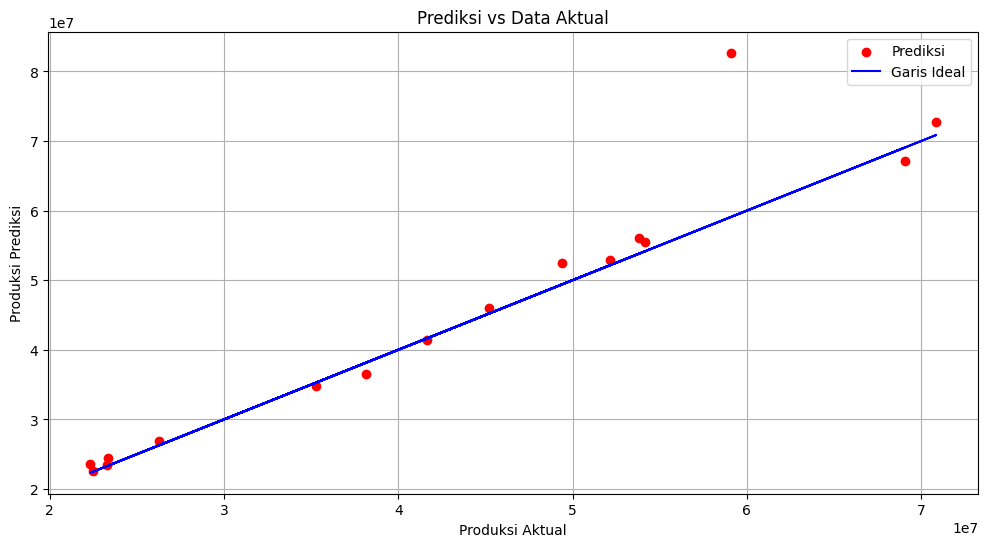

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, label='Prediksi', color='red')
plt.plot(y_test, y_test, label='Garis Ideal', color='blue')  # Garis y = x
plt.title('Prediksi vs Data Aktual')
plt.xlabel('Produksi Aktual')
plt.ylabel('Produksi Prediksi')
plt.legend()
plt.grid()
plt.show()